# Guided Project: Finding Heavy Traffic Indicators on I-94

Using I-94 Interstate data available on John Hogue's <a href ="https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume"> UCI Machine Learning Repository</a>, the project's aim is to:
* determine a few indicators of heavy traffic on <a href="https://en.wikipedia.org/wiki/Interstate_94">I-94</a>
* see whether there is a correlation between seasons/weather and flow traffic

Let's first take a quick look at the dataset

In [1]:
import pandas as pd
i94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
print(i94.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [3]:
print(i94.tail())

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  


In [4]:
i94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Analyzing Traffic Volume

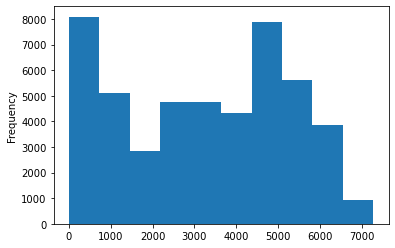

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

i94['traffic_volume'].plot.hist()

In [6]:
i94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between October 2, 2012 9AM to September 30, 2018 11PM, there were total of 48204 traffics, ranging from 0 to 7280 traffics per hour. 

## Comparing Daytime and Nighttime Traffic

Dataquest guide 

We'll start by dividing the dataset into two parts:

Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)
While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [7]:
i94['date_time']=pd.to_datetime(i94['date_time'])

In [9]:
day = i94.copy()[(i94['date_time'].dt.hour >= 7) & (i94['date_time'].dt.hour < 19)]
print(day.shape)

night = i94.copy()[(i94['date_time'].dt.hour >= 19) | (i94['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


This significant difference in row numbers between day and night is due to a few hours of missing data. For instance, if you look at rows 176 and 177 (i94.iloc[176:178]), you'll notice there's no data for two hours (4 and 5).

In [10]:
print(i94.iloc[176:178])

    holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
176    None  281.17      0.0      0.0          90       Clouds   
177    None  281.25      0.0      0.0          92        Clear   

    weather_description           date_time  traffic_volume  
176     overcast clouds 2012-10-10 03:00:00             361  
177        sky is clear 2012-10-10 06:00:00            5875  


Now that we've isolated day and night, we're going to look at the histograms of traffic volume side-by-side by using a grid chart.

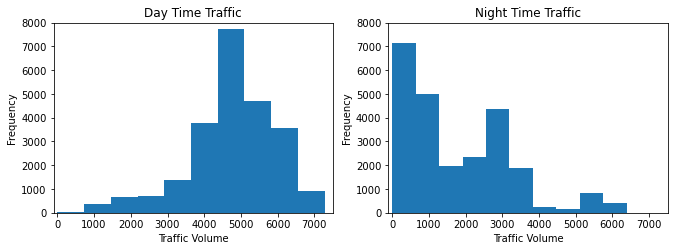

In [18]:
plt.figure(figsize=(11,3.5))
plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.title('Day Time Traffic')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.title('Night Time Traffic')
plt.show()


In [20]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [21]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Dataquest guide: The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

## Time Indicators

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day

In [23]:
day['month']= day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

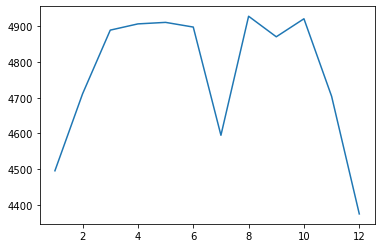

In [24]:
plt.plot(by_month['traffic_volume'])
plt.show()

Traffic looks heavier during the months of Febraury to June, then again from August to November.

Let's look into whether a specific month shows consistent volume over the years. I will take July here for instance and see if July has more traffic every year.

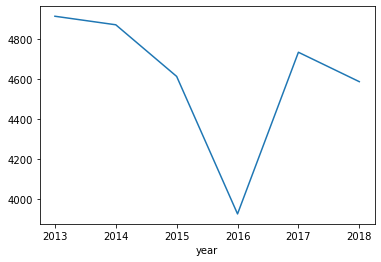

In [30]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()

In [31]:
only_july.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,year
count,2378.000000,2378.000000,2378.0,2378.000000,2378.000000,2378.0,2378.000000
mean,296.785052,4.412258,0.0,42.176619,4595.035744,7.0,2015.604289
std,4.156234,201.608213,0.0,35.695457,1279.496676,0.0,1.703351
min,283.700000,0.000000,0.0,0.000000,0.000000,7.0,2013.000000
25%,293.940000,0.000000,0.0,1.000000,4098.250000,7.0,2014.000000
50%,296.970000,0.000000,0.0,40.000000,4706.500000,7.0,2016.000000
75%,299.925000,0.000000,0.0,75.000000,5434.500000,7.0,2017.000000
max,307.330000,9831.300000,0.0,92.000000,7090.000000,7.0,2018.000000



Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction. 

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

Let's take a look at the data at a more granular level

In [34]:
day['dayofweek']=day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

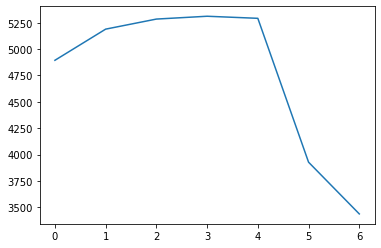

In [36]:
plt.plot(by_dayofweek['traffic_volume'])
plt.show()

Traffic remains high from Monday to Friday (x axis, 0 to 4), then drops significantly during the weekends

We'll isolate the dataset between weekday and weekends, to avoid causing the weekends values to drag down average values of the weekdays'


In [38]:
day['hour']=day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek']<=4]
weekend = day.copy()[day['dayofweek'] >= 5]
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


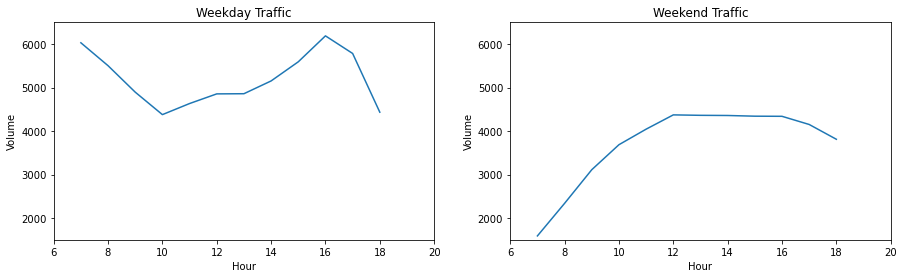

In [48]:
plt.figure(figsize=(15,4))

plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.xlabel('Hour')
plt.ylabel('Volume')
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Weekday Traffic')

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.xlabel('Hour')
plt.ylabel('Volume')
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Weekend Traffic')
plt.show()

From the graphs above, we can observe that the rush hours during the weekday are in the morning before 8AM and again around 3PM to 5PM --- indicating people commuting to and from work. While during the weekend, hours after noon til the evening shows a slight increase in traffic.

## Weather Indicator

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [51]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (rain_1h, snow_1h, clouds_all) don't show any strong correlation with traffic_value.



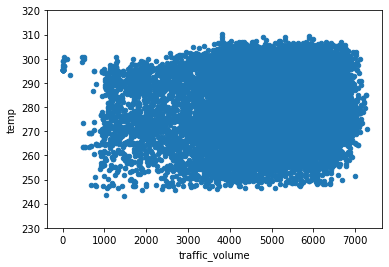

In [53]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: weather_main and weather_description.

## Weather Types

To start, we're going to group the data by weather_main and look at the traffic_volume averages.

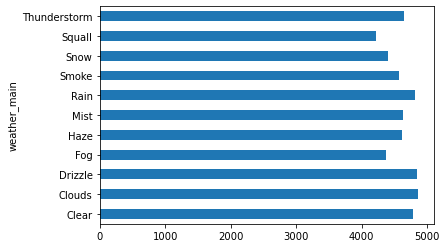

In [60]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

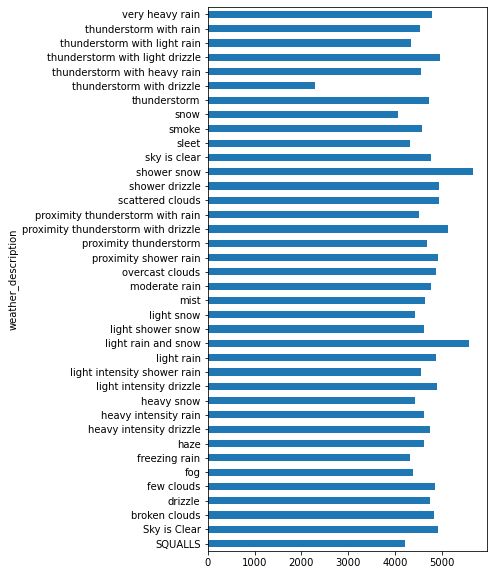

In [67]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5, 10))
plt.show()


It looks like there are three weather types where traffic volume exceeds 5,000:

Shower snow
Light rain and snow
Proximity thunderstorm with drizzle
It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

## Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

Time indicators
The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
The traffic is usually heavier on business days compared to the weekends.
On business days, the rush hours are around 7 and 16.
Weather indicators
Shower snow
Light rain and snow
Proximity thunderstorm with drizzle